# Titanic Project
# Problem Statement:
# The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



# Lets import our librarires for data manipulation,wrangling and visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis

# Lets dive deep into the data and make some analysis

In [3]:
# Lets check the number features and label
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Lets count the number of records
# As you can see we have 891 records and 12 columns representing the features and label
df.shape

(891, 12)

In [5]:
# Lets check the statistics of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Lets check the data types and a snap shot of how the data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Lets check for null values so that we can proceed with data cleaning
# From the summary we have 177 null values in the age column,2 null values in the embarked column and 687 null values in the cabin column

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Lets deal with the null values in the age column
# Lets replace the null value with the mean of the age

df['Age'] = df['Age'].fillna(df['Age'].mean())




In [9]:
# As you can see we have taken care of the null values in the age column.
# Now lets deal with the column in the cabin column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Since the cabin is a categorical data we will fill the null values with the mode of the column

df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [11]:
# As you can see we have dealt with the null values in the cabin column but we have two more null values in the embarked column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [12]:
# Lets replace the null values with the mode since its a categorical data
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
# we have dealt with all the null values in this dataset and its good to go for further analysis.


df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# if you look at the count row you will see that accross the columns the data count is 891,which means that all our null values has been dealt with.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Looking at this data we know that passenger id,ticket,nanme are not important inputs in determining the output of the target label
# we will have to drop these columns

df = df.drop(['PassengerId','Name','Ticket'],axis=1)


In [18]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

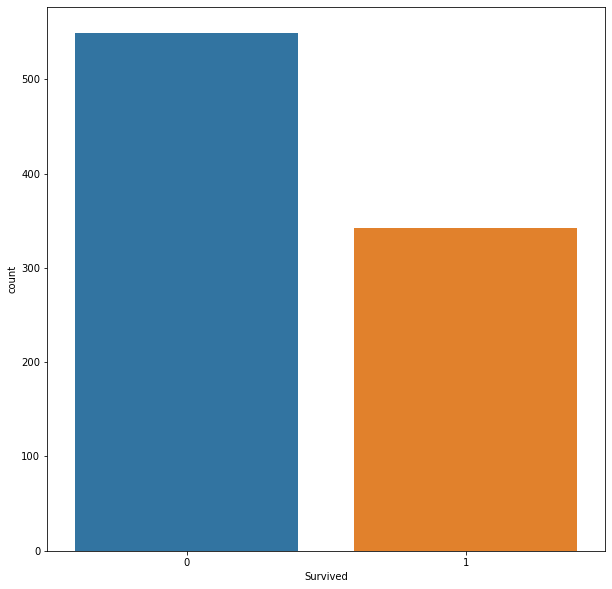

In [19]:
# Lets do a univariate analysis of the survived column by plotiing some visualisations
# From the visualisation we have more people that died than those that survived.we will have to dive deep into the data to find out the break down of those that survived and those that didnt.

plt.figure(figsize=(10,10))

sns.countplot(df['Survived'],data=df)

In [20]:
df.Survived.sort_values().count()

891

In [21]:
df_group = df.Survived.groupby(df['Sex'])
print(df_group)

In [22]:
# we have three categorical columns cabin,embarked and sex.
# we will have to perform label encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [23]:
# Let perform label encoding to encode the categorical data
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df['Sex'] = encode.fit_transform(df['Sex'])
df['Cabin'] = encode.fit_transform(df['Cabin'])
df['Embarked'] = encode.fit_transform(df['Embarked'])

In [24]:
# we have three categorical columns cabin,embarked and sex.
# As you can see the categorical data has been encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

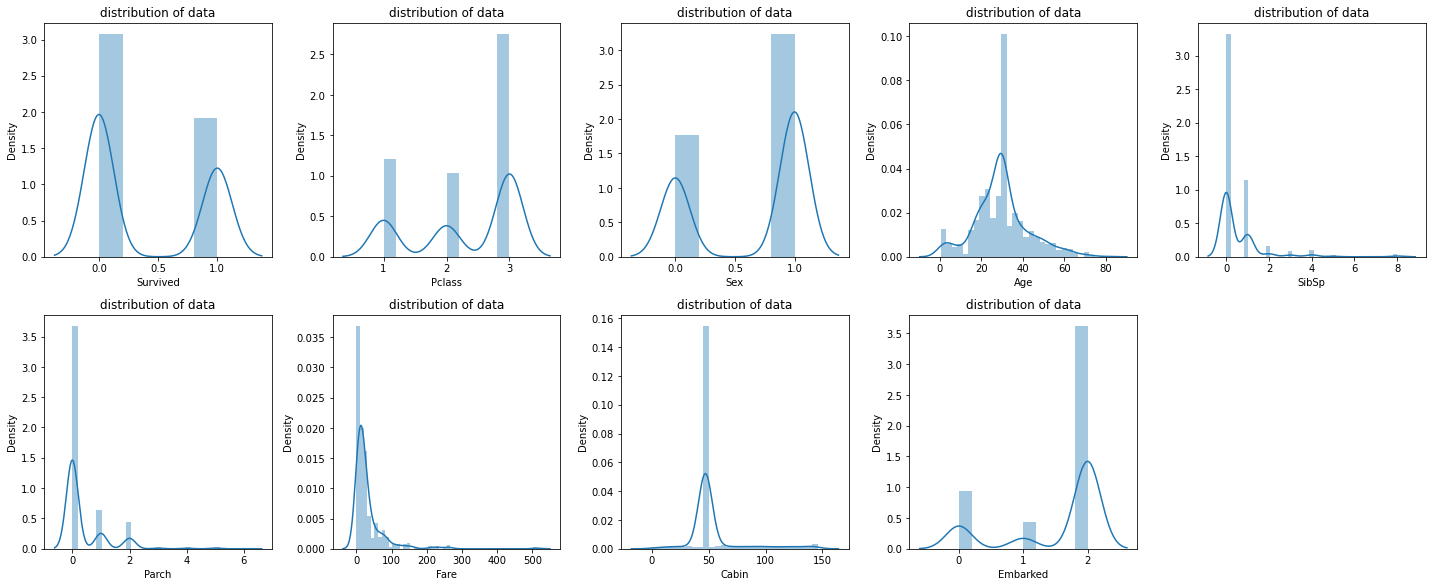

In [25]:
# Lets perform multivariate analysis through visualisation

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=9:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.title('distribution of data')
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\l

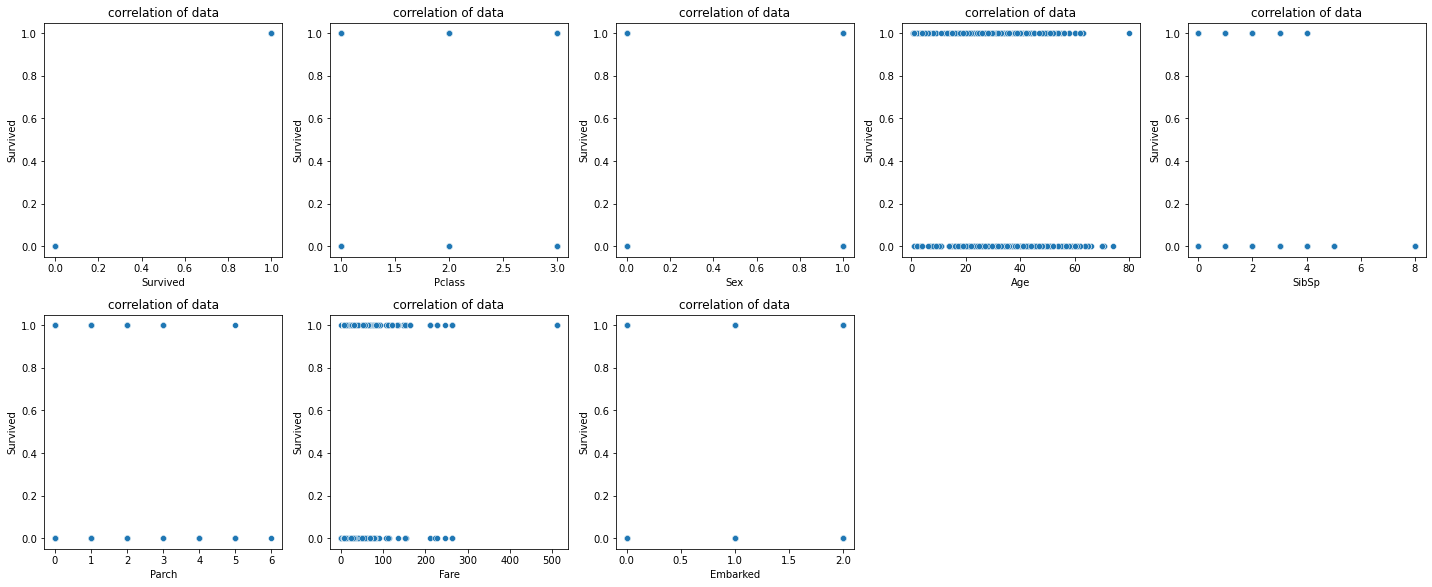

In [57]:
# Lets perform multivariate analysis through visualisation.correlation between features and label

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=9:
        plt.subplot(5,5,plotnumber)
        sns.scatterplot(df[column],df['Survived'])
        plt.title('correlation of data')
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

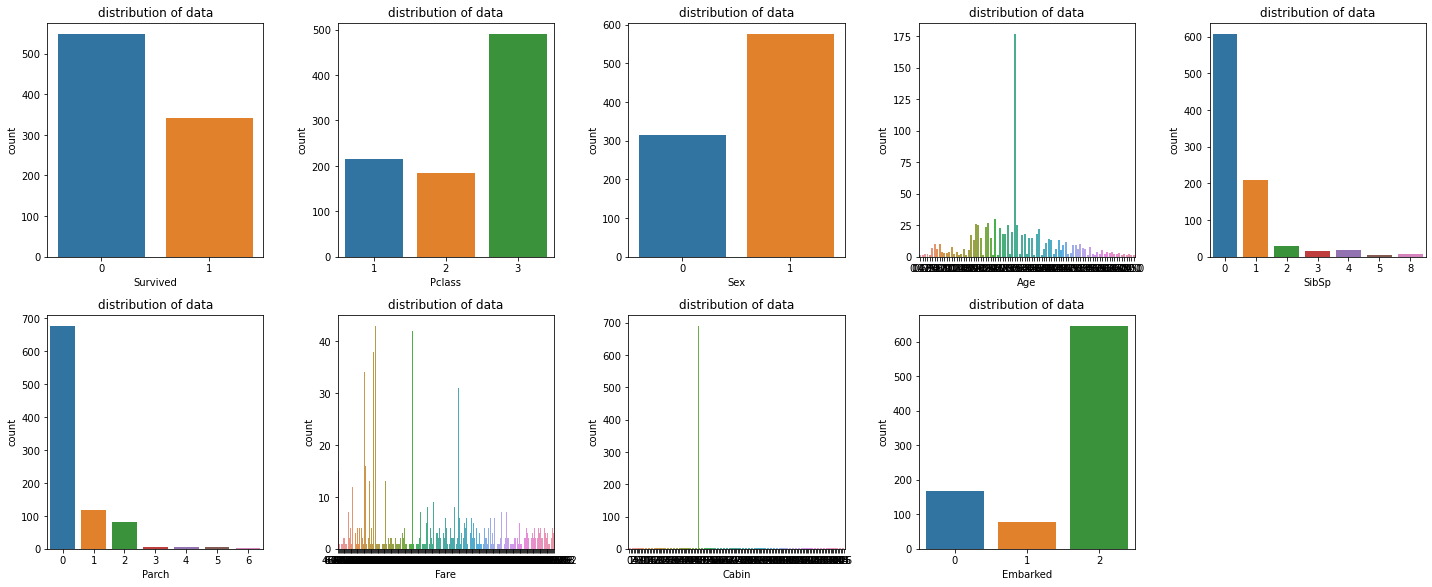

In [26]:
# Lets perform multivariate analysis through visualisation

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=9:
        plt.subplot(5,5,plotnumber)
        sns.countplot(df[column])
        plt.title('distribution of data')
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution')

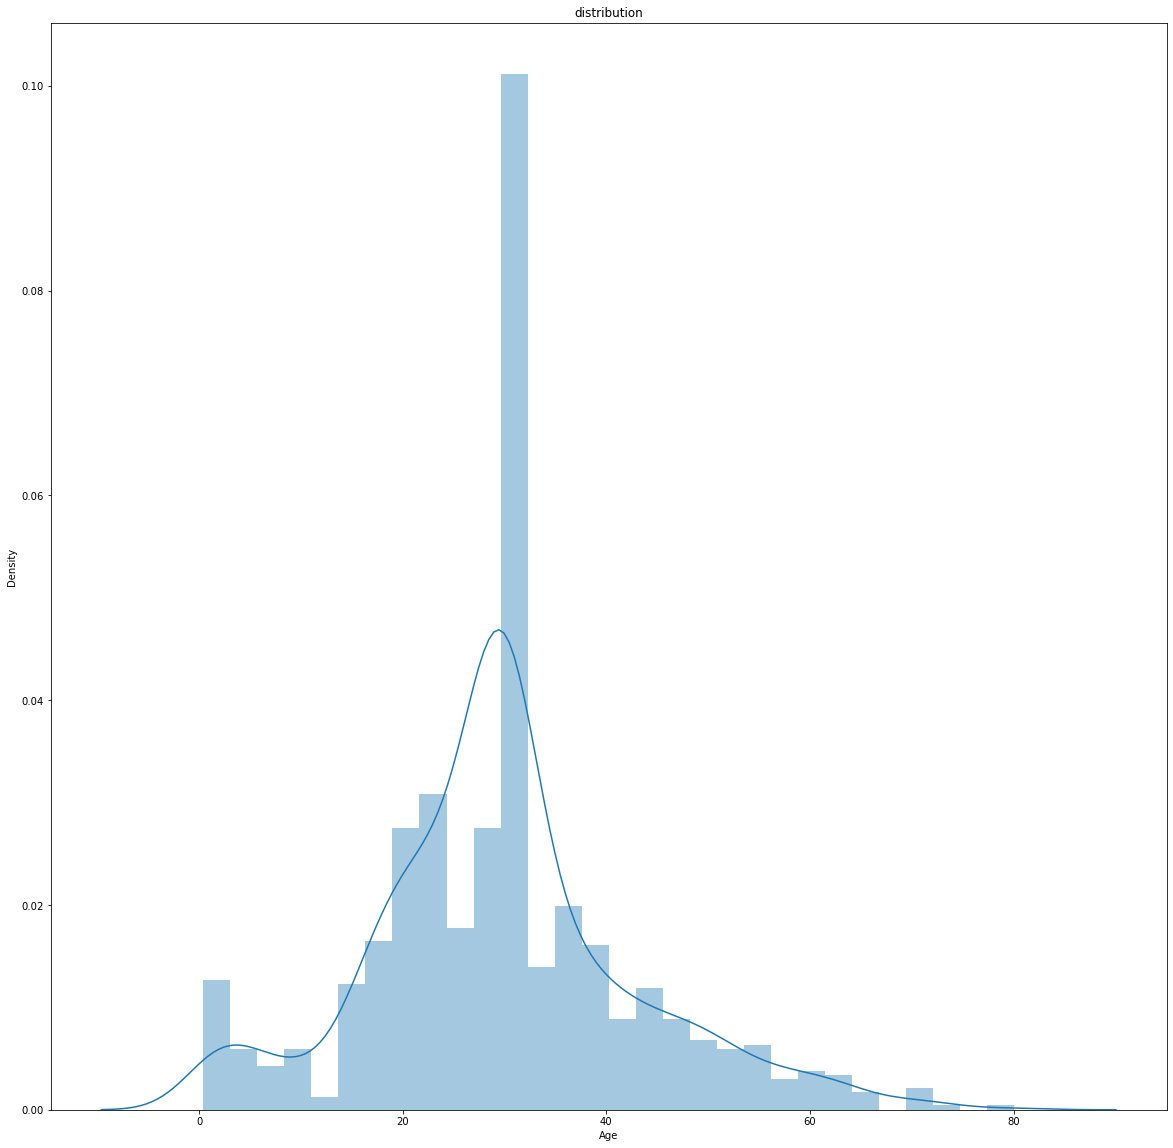

In [27]:
# conducting univariate analysis by looking at the age
plt.figure(figsize=(20,20))
sns.distplot(df['Age'])
plt.title('distribution')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution')

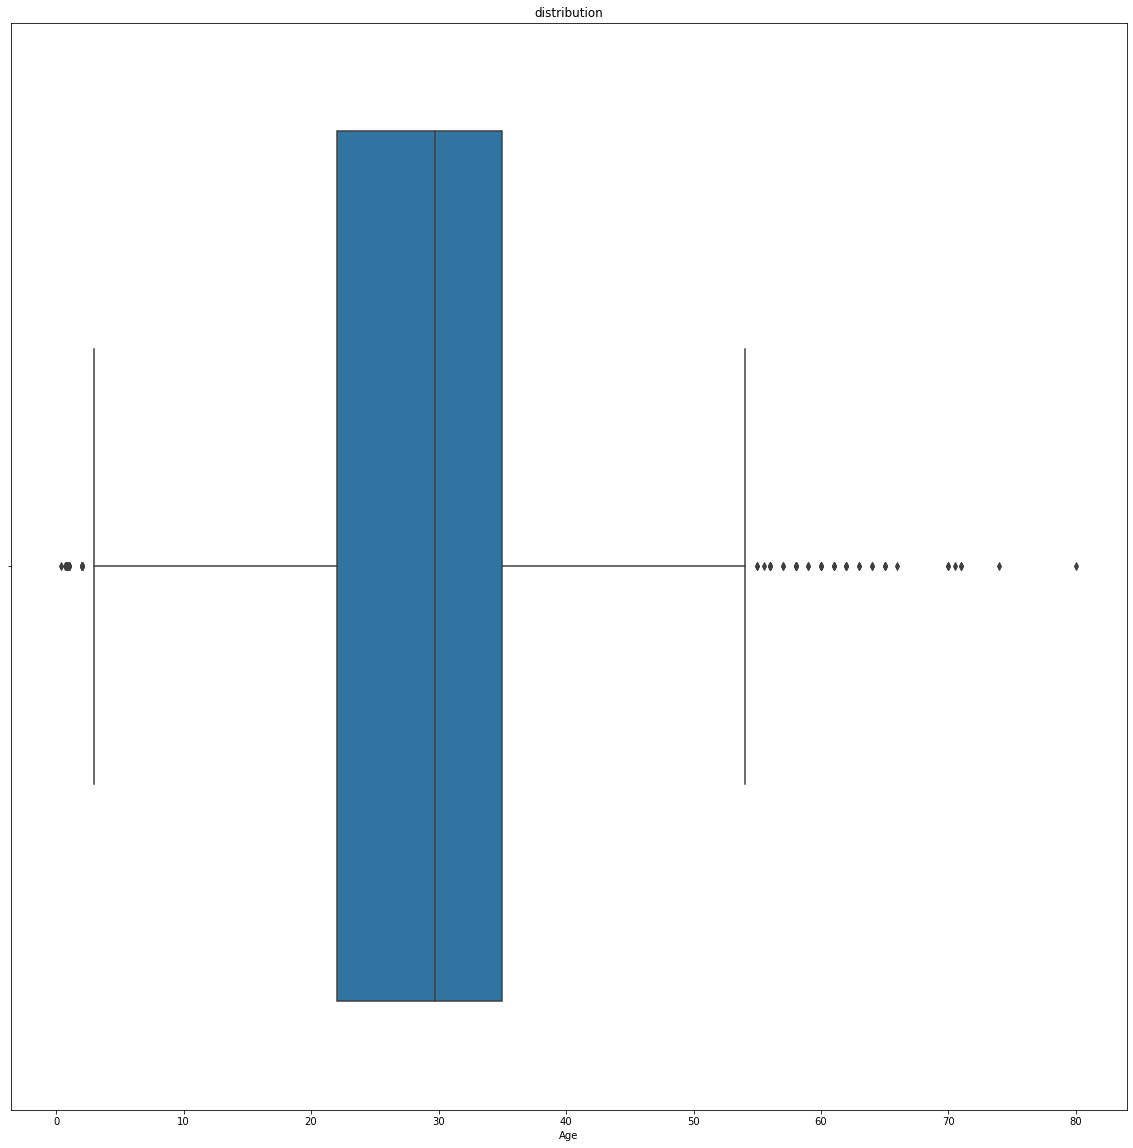

In [28]:
# conducting univariate analysis by looking at the age and checking for outliers by plotting box plot
# from the plot we has 22 outliers,18 in the upper region and 4 in the lower region 
plt.figure(figsize=(20,20))
sns.boxplot(df['Age'])
plt.title('distribution')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution')

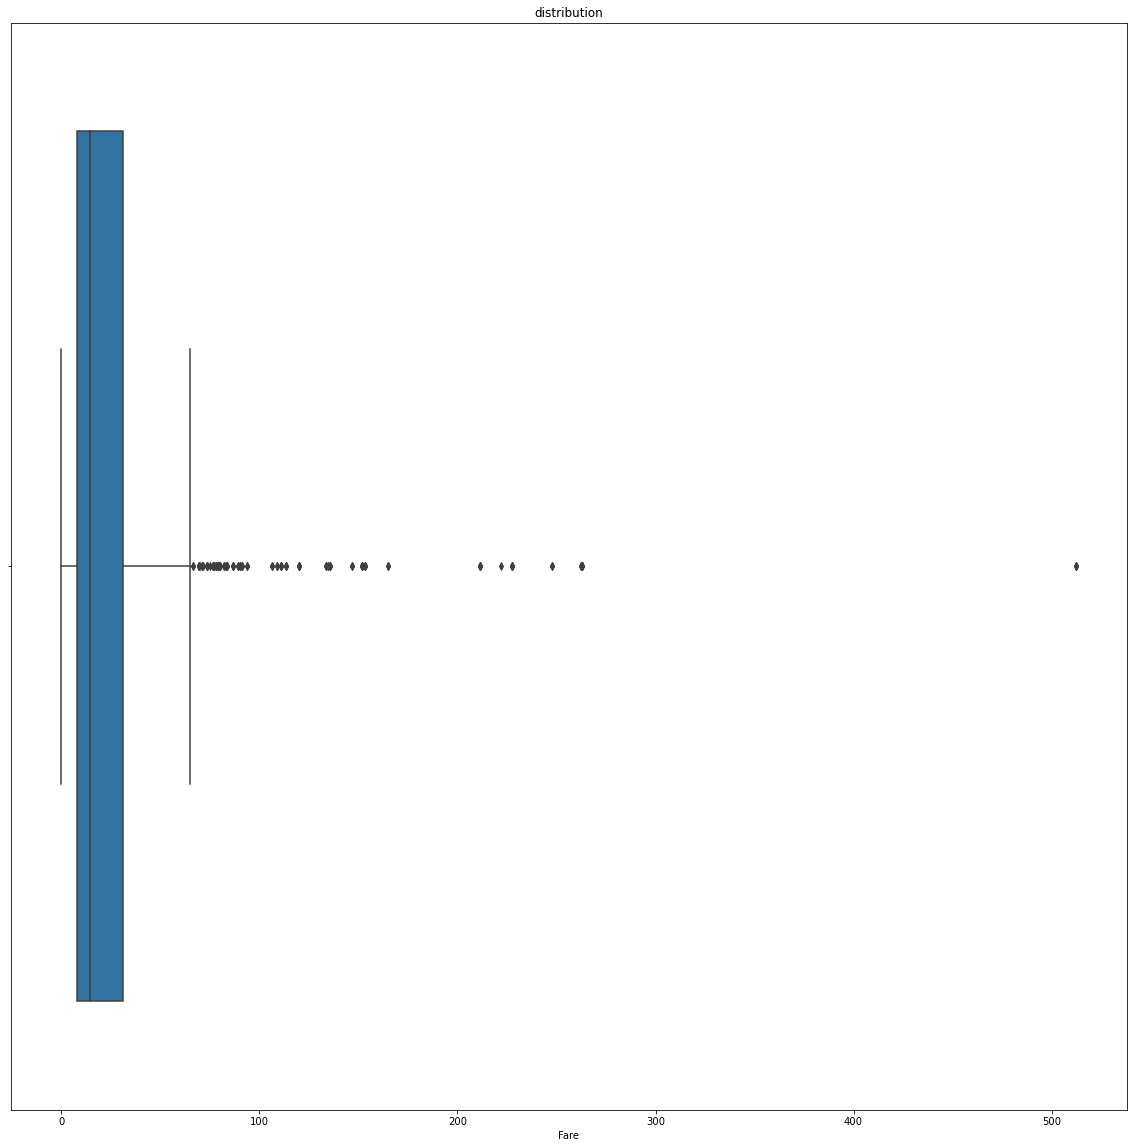

In [29]:
# conducting univariate analysis by looking at the fare and checking for outliers by plotting box plot
# from the plot we have about 52 outliers in the upper region
plt.figure(figsize=(20,20))
sns.boxplot(df['Fare'])
plt.title('distribution')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution')

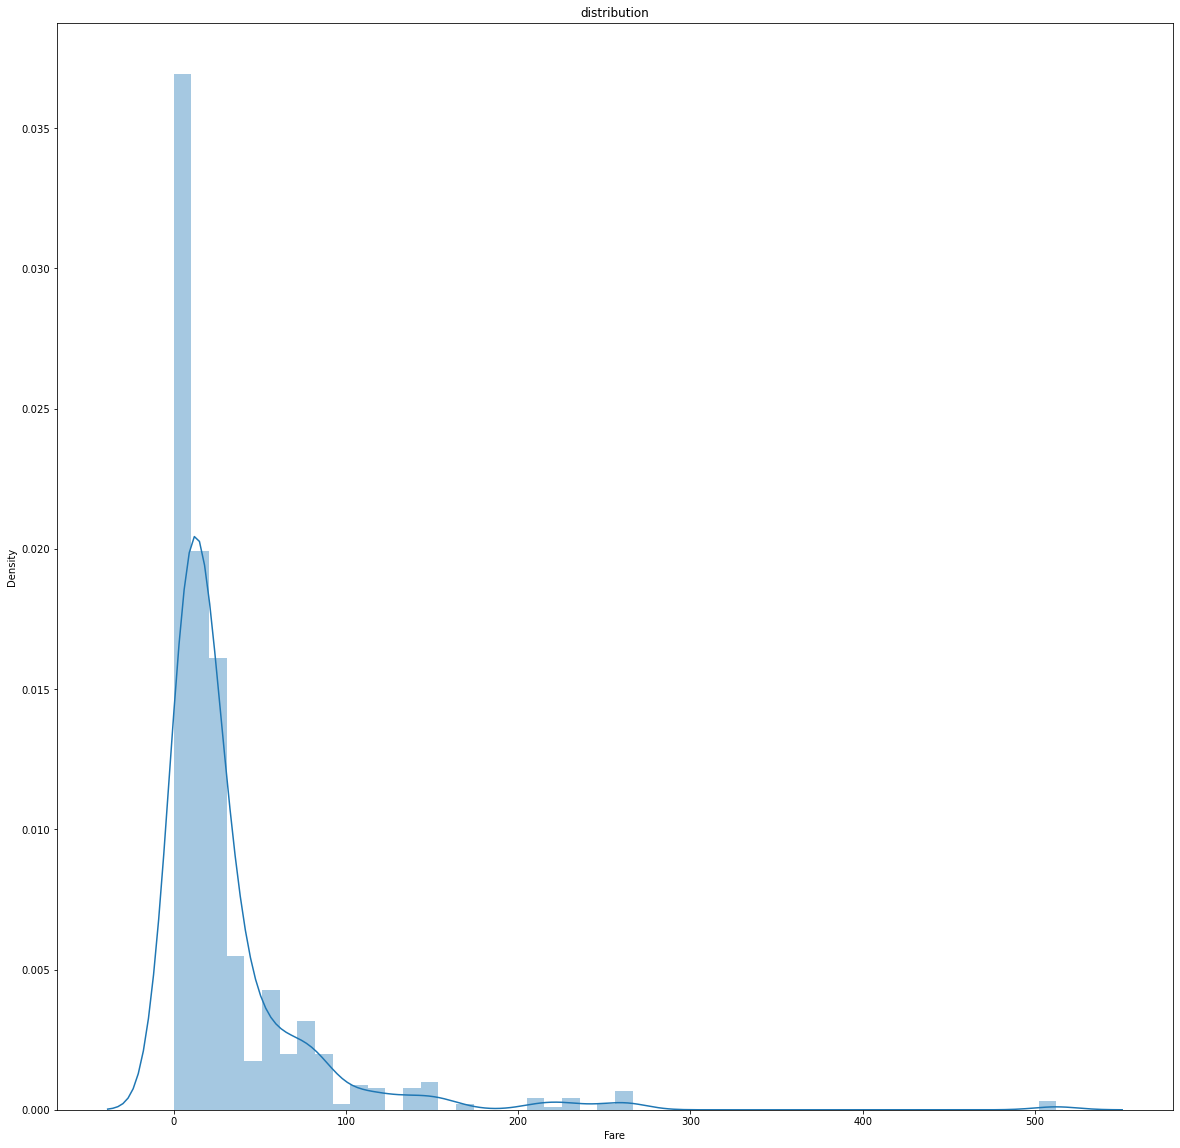

In [30]:
# conducting univariate analysis by looking at the fare
# The ourliers and skewness in the fare is understandable because of the class of people onboard the ship
# its obvious that the fare of those in the upper class will definitely be far higher than those in the lower class.
# we will have to keep the outliers because it is important data
plt.figure(figsize=(20,20))
sns.distplot(df['Fare'])
plt.title('distribution')

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'distribution')

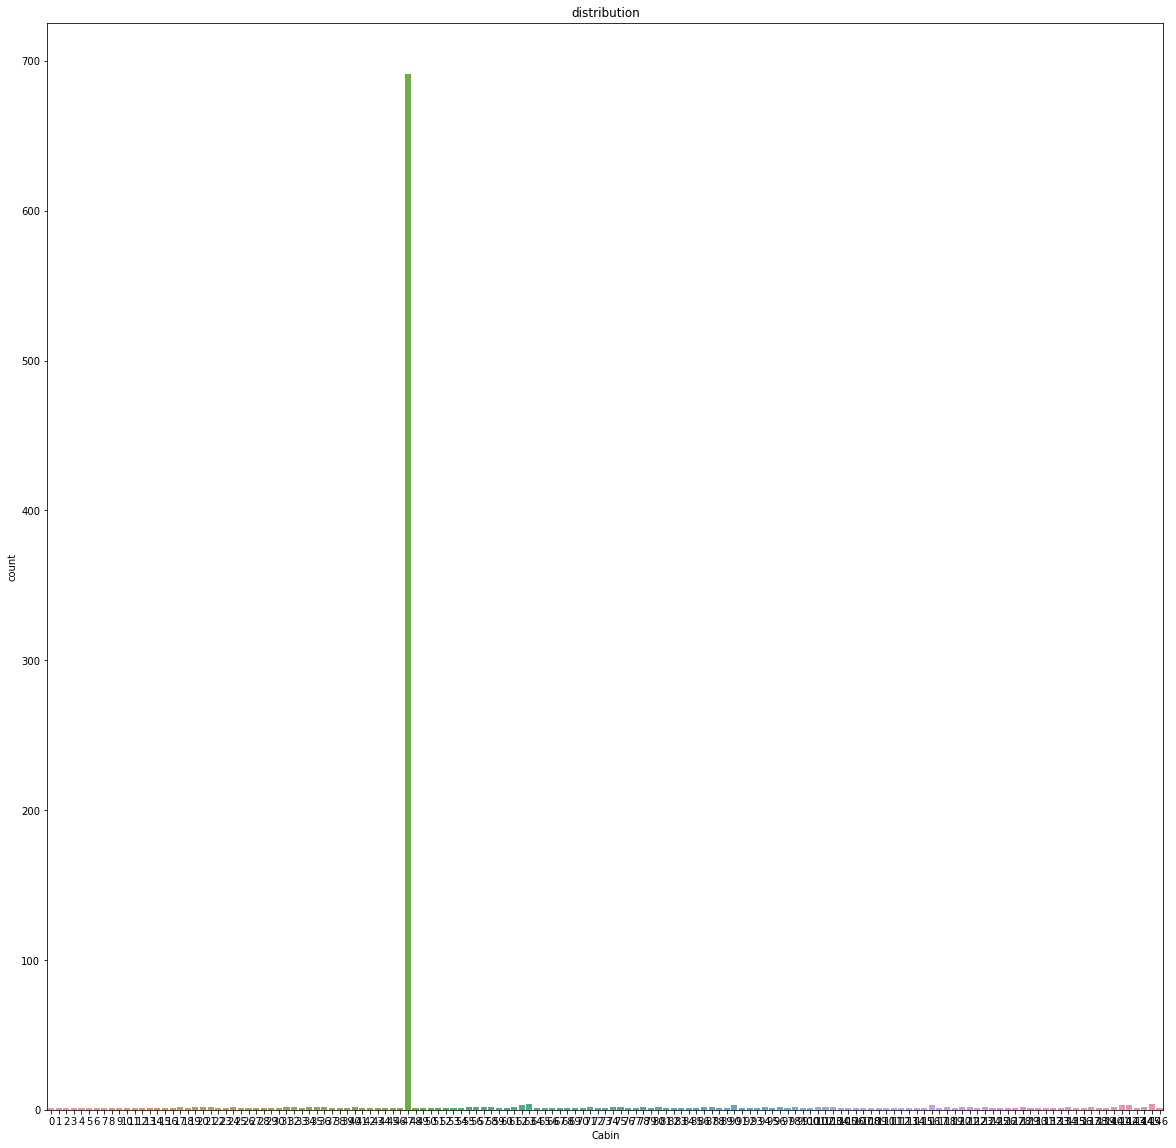

In [31]:
#we will have to drop the cabin because its to contributing anything to the survival chances
plt.figure(figsize=(20,20))
sns.countplot(df['Cabin'])
plt.title('distribution')

In [32]:
df = df.drop('Cabin',axis=1)

In [33]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [34]:
# looking at the correlation matrix and summary we can see that sex,fare,class had more correlations with the survived column.
# This actually means that the sex,fare and the class contributed to whether or not anyone onboard the ship survived or not.
# so those who payed higher fares stayed in the upper class and survived.
# And the more attention was given to the females which was what led to them having more survivals
# where they embarked from also had weak correlations so we will keep this feature
# here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together


df.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

<AxesSubplot:>

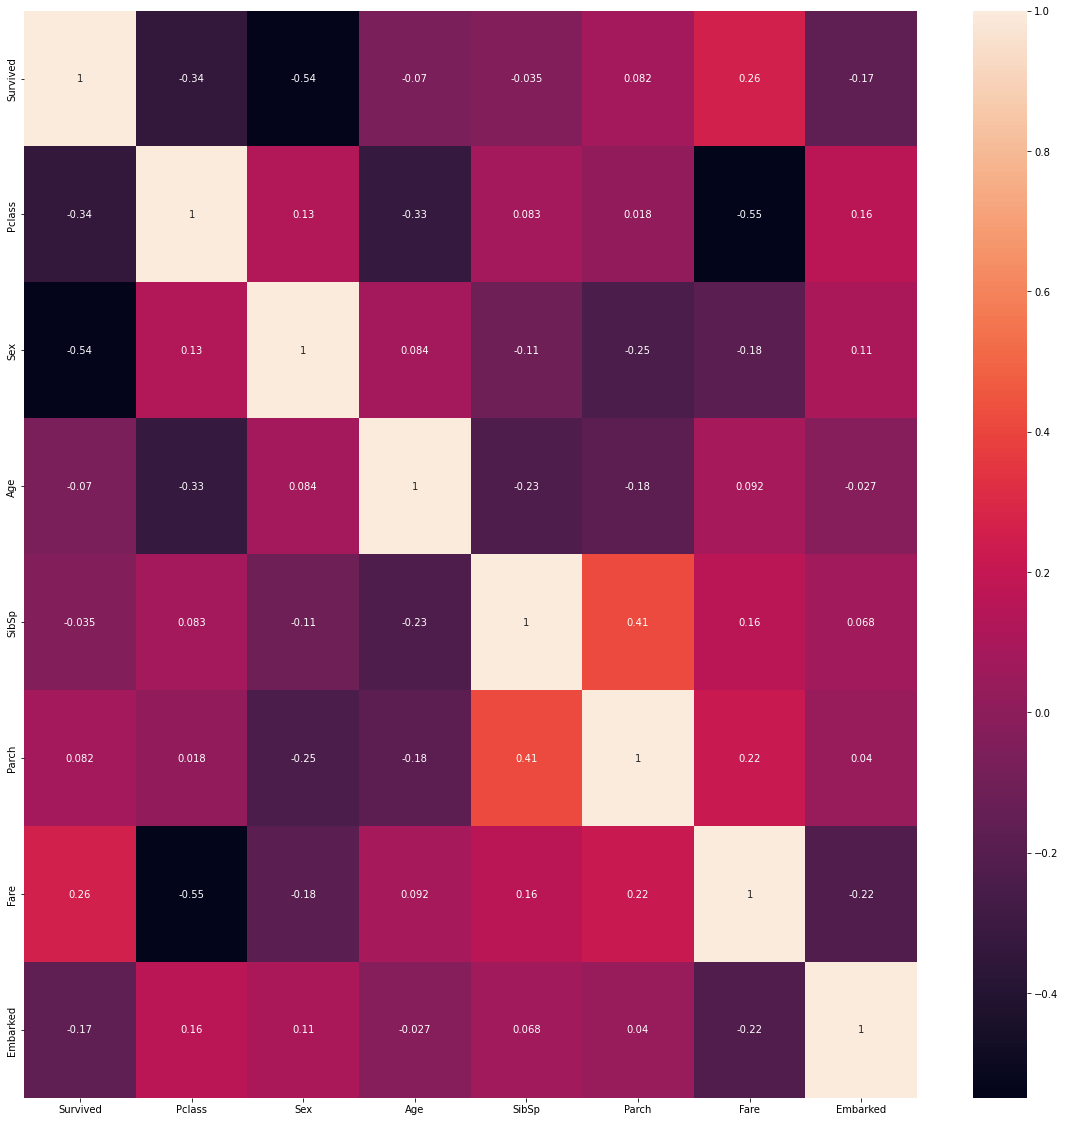

In [35]:
# Lets perform multivariate analysis through visualisation
# here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

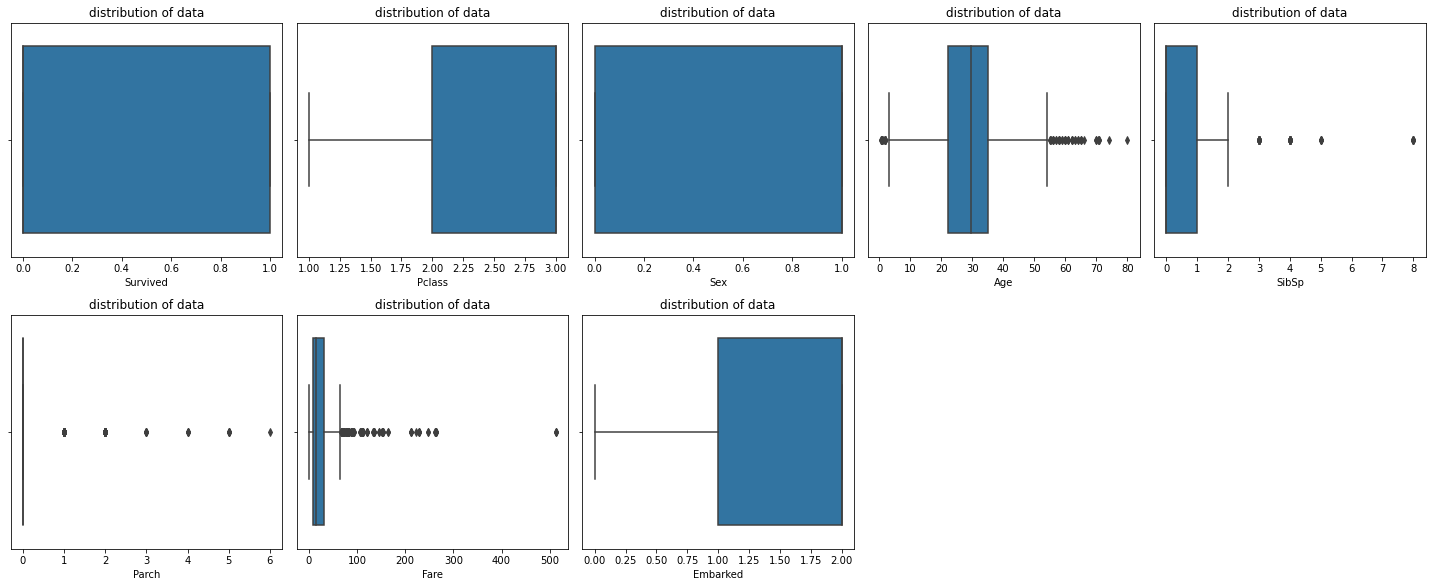

In [36]:
# Lets perform multivariate analysis through visualisation
# here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

plt.figure(figsize=(20,20))

plotnumber = 1

for column in df:
    if plotnumber<=9:
        plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column])
        plt.title('distribution of data')
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()    

In [ ]:
# we can see outliers in age,sibsp an fare and like i said earlier we are not dropping any outlier in the fares column because of the disparity between the classses which inturn makes the fares to be very high

In [37]:
bysex=df['Sex'].value_counts()
print(bysex)

1    577
0    314
Name: Sex, dtype: int64


In [48]:
# from the count below we have a total of 577 males an 314 females
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


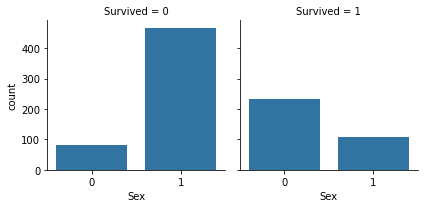

In [38]:
plot1 = sns.FacetGrid(df, col='Survived')
plot1.map(sns.countplot,'Sex')

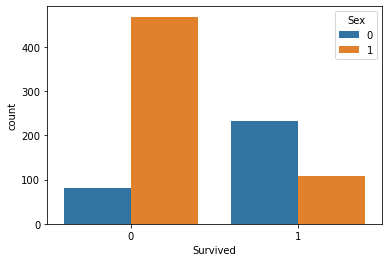

In [40]:
# from this plot more men died compared to women and this is very understandable because women were given more preference in saving their lives
# More women survived compared to men
ax = sns.countplot(x="Survived", hue="Sex", data=df)

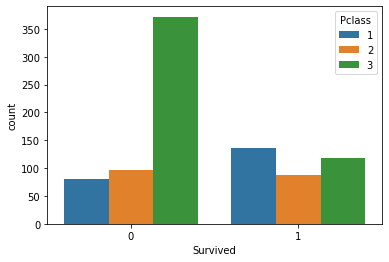

In [50]:
# from the pclass the passengers that paid more stayed in the upper class.
#From the analysis those that paid more an were in pclass wine survived more compared to those in pclass3.
#Those in the lower class(pclass3) died more.

ax = sns.countplot(x="Survived", hue="Pclass", data=df)

In [70]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.415100,22.117887,0.329690,2.531876,0.553734
1,28.549778,48.395408,0.464912,1.950292,0.473684


# The inference we can draw from this table is:

#     The average age of survivors is 28, so young people tend to survive more.
#     People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
#     In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
#     And if you are a child, and have siblings, you have less of a chance of surviving


In [71]:
# Feature selection for model building

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [72]:
# since there is multicolinearity between the parch and siblings we will drop parch.
# The colinearity between the embarked and survived is weak so we drop it to


df = df.drop(['Parch','Embarked'],axis=1)



In [74]:
# Lets split the data for training and testing

from sklearn.model_selection import train_test_split

In [75]:
y = df['Survived']
x = df.drop('Survived',axis=1)

In [76]:
# Lets scale the data
from sklearn.preprocessing import StandardScaler

In [77]:
scale = StandardScaler()
x_scale = scale.fit_transform(x)

In [78]:
# lets import our models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,cross_validate

# Model selection and building and model evaluation

In [81]:
# Lets use many moels and check their performance
# we will me using 10 models and inturn evaluate the performance of the best model
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=i)
    lr = LogisticRegression()
    kc = KNeighborsClassifier()
    sv = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    ac = AdaBoostClassifier()
    gc =GradientBoostingClassifier()
    sc = SGDClassifier()
    xg = XGBRFClassifier()
    lr.fit(x_train,y_train)
    kc.fit(x_train,y_train)
    sv.fit(x_train,y_train)
    nb.fit(x_train,y_train)
    dt.fit(x_train,y_train)
    rf.fit(x_train,y_train)
    ac.fit(x_train,y_train)
    gc.fit(x_train,y_train)
    sc.fit(x_train,y_train)
    xg.fit(x_train,y_train)
    y_pred_lr = lr.predict(x_test)
    y_pred_kc = kc.predict(x_test)
    y_pred_sv = sv.predict(x_test)
    y_pred_nb = nb.predict(x_test)
    y_pred_dt = dt.predict(x_test)
    y_pred_rf = rf.predict(x_test)
    y_pred_ac = ac.predict(x_test)
    y_pred_gc = gc.predict(x_test)
    y_pred_sc = sc.predict(x_test)
    y_pred_xg = xg.predict(x_test)
    print(f'The accuracy score at random state {i} for lr model is:',accuracy_score(y_test,y_pred_lr))
    print(f'The accuracy score at random state {i} for kc model is:',accuracy_score(y_test,y_pred_kc))
    print(f'The accuracy score at random state {i} for sv model is:',accuracy_score(y_test,y_pred_sv))
    print(f'The accuracy score at random state {i} for nb model is:',accuracy_score(y_test,y_pred_nb))
    print(f'The accuracy score at random state {i} for dt model is:',accuracy_score(y_test,y_pred_dt))
    print(f'The accuracy score at random state {i} for rf model is:',accuracy_score(y_test,y_pred_rf))
    print(f'The accuracy score at random state {i} for ac model is:',accuracy_score(y_test,y_pred_ac))
    print(f'The accuracy score at random state {i} for gc model is:',accuracy_score(y_test,y_pred_gc))
    print(f'The accuracy score at random state {i} for sc model is:',accuracy_score(y_test,y_pred_sc))
    print(f'The accuracy score at random state {i} for xg model is:',accuracy_score(y_test,y_pred_xg))
print('Model training done')    
    
    
    
    
    
    
    
    
    

The accuracy score at random state 1 for lr model is: 0.7988826815642458
The accuracy score at random state 1 for kc model is: 0.7430167597765364
The accuracy score at random state 1 for sv model is: 0.7877094972067039
The accuracy score at random state 1 for nb model is: 0.7486033519553073
The accuracy score at random state 1 for dt model is: 0.7486033519553073
The accuracy score at random state 1 for rf model is: 0.7877094972067039
The accuracy score at random state 1 for ac model is: 0.7486033519553073
The accuracy score at random state 1 for gc model is: 0.7932960893854749
The accuracy score at random state 1 for sc model is: 0.7206703910614525
The accuracy score at random state 1 for xg model is: 0.8044692737430168
The accuracy score at random state 2 for lr model is: 0.770949720670391
The accuracy score at random state 2 for kc model is: 0.776536312849162
The accuracy score at random state 2 for sv model is: 0.7932960893854749
The accuracy score at random state 2 for nb model is:

In [82]:
# Lets use many moels and check their performance
# we will me using 10 models and inturn evaluate the performance of the best model
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=i)
    lr = LogisticRegression()
    kc = KNeighborsClassifier()
    sv = SVC()
    nb = GaussianNB()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    ac = AdaBoostClassifier()
    gc =GradientBoostingClassifier()
    sc = SGDClassifier()
    xg = XGBRFClassifier()
    lr.fit(x_train,y_train)
    kc.fit(x_train,y_train)
    sv.fit(x_train,y_train)
    nb.fit(x_train,y_train)
    dt.fit(x_train,y_train)
    rf.fit(x_train,y_train)
    ac.fit(x_train,y_train)
    gc.fit(x_train,y_train)
    sc.fit(x_train,y_train)
    xg.fit(x_train,y_train)
    y_pred_lr = lr.predict(x_test)
    y_pred_kc = kc.predict(x_test)
    y_pred_sv = sv.predict(x_test)
    y_pred_nb = nb.predict(x_test)
    y_pred_dt = dt.predict(x_test)
    y_pred_rf = rf.predict(x_test)
    y_pred_ac = ac.predict(x_test)
    y_pred_gc = gc.predict(x_test)
    y_pred_sc = sc.predict(x_test)
    y_pred_xg = xg.predict(x_test)
    if accuracy_score(y_test,y_pred_lr) > 0.85:
        print(f'The accuracy score at random state {i} for lr model is:',accuracy_score(y_test,y_pred_lr))
        print(f'The accuracy score at random state {i} for kc model is:',accuracy_score(y_test,y_pred_kc))
        print(f'The accuracy score at random state {i} for sv model is:',accuracy_score(y_test,y_pred_sv))
        print(f'The accuracy score at random state {i} for nb model is:',accuracy_score(y_test,y_pred_nb))
        print(f'The accuracy score at random state {i} for dt model is:',accuracy_score(y_test,y_pred_dt))
        print(f'The accuracy score at random state {i} for rf model is:',accuracy_score(y_test,y_pred_rf))
        print(f'The accuracy score at random state {i} for ac model is:',accuracy_score(y_test,y_pred_ac))
        print(f'The accuracy score at random state {i} for gc model is:',accuracy_score(y_test,y_pred_gc))
        print(f'The accuracy score at random state {i} for sc model is:',accuracy_score(y_test,y_pred_sc))
        print(f'The accuracy score at random state {i} for xg model is:',accuracy_score(y_test,y_pred_xg))
print('Model training done')    
    
    
    
    
    
    
    
    
    

The accuracy score at random state 6 for lr model is: 0.8603351955307262
The accuracy score at random state 6 for kc model is: 0.8547486033519553
The accuracy score at random state 6 for sv model is: 0.8659217877094972
The accuracy score at random state 6 for nb model is: 0.8324022346368715
The accuracy score at random state 6 for dt model is: 0.7877094972067039
The accuracy score at random state 6 for rf model is: 0.8435754189944135
The accuracy score at random state 6 for ac model is: 0.8770949720670391
The accuracy score at random state 6 for gc model is: 0.8715083798882681
The accuracy score at random state 6 for sc model is: 0.6927374301675978
The accuracy score at random state 6 for xg model is: 0.8603351955307262
Model training done


In [87]:
# From the table the adaptive boosting classifier has a better accuracy
model = pd.DataFrame({'model':[lr,kc,sv,nb,dt,rf,ac,gc,sc,xg],'accuracy':[0.860,0.854,0.865,0.832,0.787,0.843,0.877,0.871,0.692,0.860]})
model

,model,accuracy
0,LogisticRegression(),0.860
1,KNeighborsClassifier(),0.854
2,SVC(),0.865
3,GaussianNB(),0.832
4,DecisionTreeClassifier(),0.787
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.843
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.877
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.871
8,SGDClassifier(),0.692
9,"XGBRFClassifier(base_score=0.5, booster='gbtre...",0.860


In [83]:
# From the training of these models we have the best model with the optimal random state of 6. 
# The best model is adaptive boosting at random state of 6

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=6)
ac = AdaBoostClassifier()
ac.fit(x_train,y_train)
y_pred_ac = ac.predict(x_test)
print('The accuracy score for adaptive boost classifier model is:',accuracy_score(y_test,y_pred_ac))
print('The confusion matrix for adaptive boost classifier model is:',confusion_matrix(y_test,y_pred_ac))
print('The classification report for adaptive boost classifier model is:',classification_report(y_test,y_pred_ac))

    


The accuracy score for adaptive boost classifier model is: 0.8770949720670391
The confusion matrix for adaptive boost classifier model is: [[106   7]
 [ 15  51]]
The classification report for adaptive boost classifier model is:               precision    recall  f1-score   support

           0       0.88      0.94      0.91       113
           1       0.88      0.77      0.82        66

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.86       179
weighted avg       0.88      0.88      0.88       179



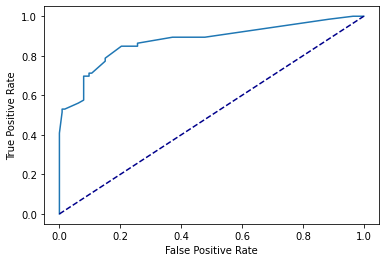

In [96]:
#define metrics
from sklearn import metrics

y_pred_ac = ac.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ac)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

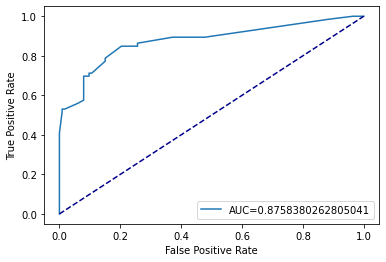

In [97]:
# Lets calculate the auc
#define metrics
y_pred_ac = ac.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ac)
auc = metrics.roc_auc_score(y_test, y_pred_ac)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1], [0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# we have an auc of 0.889 which means that this model does a good job of classifying the data

# Lets do some hyper parameter tuning to improve the performance of the adaptive boosting model

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
#Creating a grid of hyperparametersgrid_params = {'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV objectgrid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training datagrid_object.fit(X_train, y_train)
#Extracting the best parametersgrid_object.bestparams 

In [92]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ac,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)



In [93]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [94]:
search.best_score_

0.7892544075642667

In [95]:
ac = AdaBoostClassifier(learning_rate=0.01,n_estimators=500)
ac.fit(x_train,y_train)
y_pred_ac = ac.predict(x_test)
print('The accuracy score for adaptive boost classifier model is:',accuracy_score(y_test,y_pred_ac))
print('The confusion matrix for adaptive boost classifier model is:',confusion_matrix(y_test,y_pred_ac))
print('The classification report for adaptive boost classifier model is:',classification_report(y_test,y_pred_ac))



The accuracy score for adaptive boost classifier model is: 0.8268156424581006
The confusion matrix for adaptive boost classifier model is: [[102  11]
 [ 20  46]]
The classification report for adaptive boost classifier model is:               precision    recall  f1-score   support

           0       0.84      0.90      0.87       113
           1       0.81      0.70      0.75        66

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [ ]:
# Hyper parameter tuning didnt improve the performance of the model

# Model saving

In [ ]:
# lets save this model

In [98]:
import pickle
filename = 'titanic.pkl'
pickle.dump(ac,open(filename,'wb'))